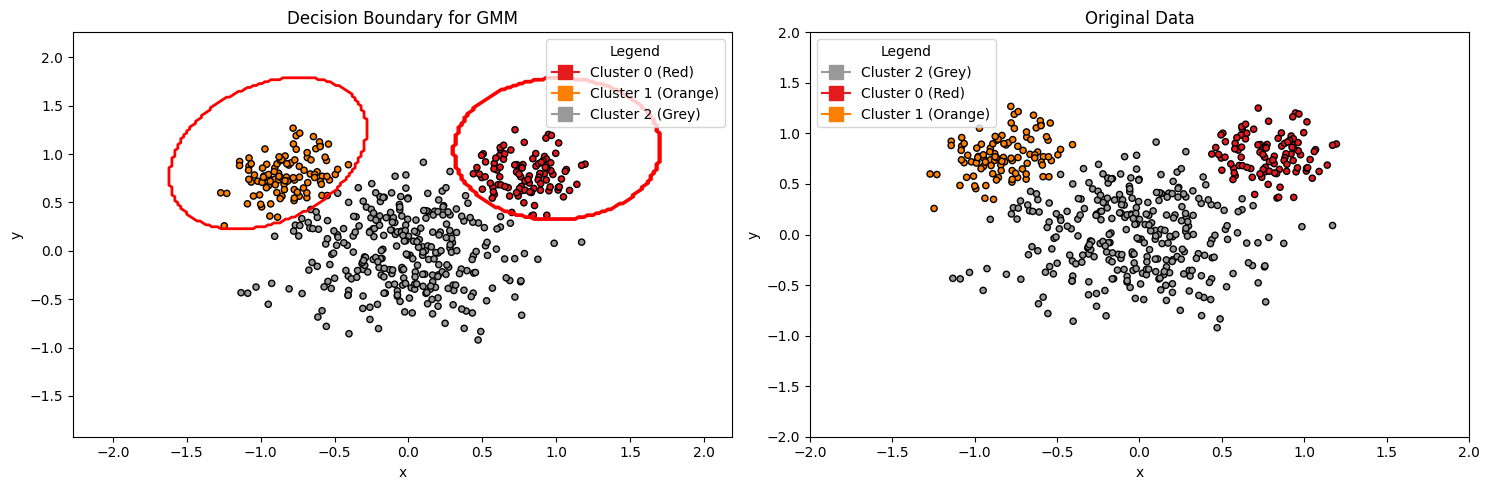

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D
from sklearn.mixture import GaussianMixture

# SECTION 1: "mouse" dataset
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0, 0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0, 0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0, 0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

data_X = np.vstack([data1, data2, data3])

# SECTION 2: GMM z 3 klastrami
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(data_X)
labels = gmm.predict(data_X)
norm = Normalize(vmin=0, vmax=2)

# zakres od -2 do 2
x_min, x_max = -2.0, 2.0
y_min, y_max = -2.0, 2.0

# SECTION 3: mesh grid dla predykcji granicy decyzyjnej
h = 0.02
grid_x_min, grid_x_max = data_X[:,0].min() - 1, data_X[:,0].max() + 1
grid_y_min, grid_y_max = data_X[:,1].min() - 1, data_X[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(grid_x_min, grid_x_max, h),
                     np.arange(grid_y_min, grid_y_max, h))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# etykiety na podstawie maksymalnego prawdopodobieństwa
probs = gmm.predict_proba(grid_points)
Z = np.argmax(probs, axis=1)
Z = Z.reshape(xx.shape)

# SECTION 4: Wizualizacja
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Wykres 1: Granica decyzyjna
axes[0].contour(xx, yy, Z, levels=[0.5, 1.5, 2.5], colors='red', linewidths=2)
axes[0].scatter(data_X[:, 0], data_X[:, 1], c=labels, cmap='Set1', s=20, norm=norm, edgecolor='k')
axes[0].set_title("Decision Boundary for GMM")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")

legend_elements = [
    Line2D([0], [0], marker='s', color=plt.cm.Set1(0.0), markersize=10, label='Cluster 0 (Red)'),
    Line2D([0], [0], marker='s', color=plt.cm.Set1(0.5), markersize=10, label='Cluster 1 (Orange)'),
    Line2D([0], [0], marker='s', color=plt.cm.Set1(1.0), markersize=10, label='Cluster 2 (Grey)')
]
axes[0].legend(handles=legend_elements, loc='best', frameon=True, title="Legend")

# Wykres: Oryginalne dane
axes[1].scatter(data_X[:, 0], data_X[:, 1], c=labels, cmap='Set1', s=20, norm=norm, edgecolor='k')
axes[1].set_title("Original Data")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].set_xlim([x_min, x_max])
axes[1].set_ylim([y_min, y_max])

legend_elements2 = [
    Line2D([0], [0], marker='s', color=plt.cm.Set1(1.0), markersize=10, label='Cluster 2 (Grey)'),
    Line2D([0], [0], marker='s', color=plt.cm.Set1(0.0), markersize=10, label='Cluster 0 (Red)'),
    Line2D([0], [0], marker='s', color=plt.cm.Set1(0.5), markersize=10, label='Cluster 1 (Orange)')
]
axes[1].legend(handles=legend_elements2, loc='best', frameon=True, title="Legend")

plt.tight_layout()
plt.show()


## Metoda wizualizacji granicy decyzyjnej w GMM

Metoda wizualizacji granicy decyzyjnej w modelu GMM opiera się na wykorzystaniu wyników funkcji predict_proba, która dla dowolnego punktu $x$ oblicza wektor  prawdopodobieństw a posteriori dla każdego z $K$ klastrów. Dla punktu $x_n$ mamy:

$$
\gamma_{n, k}=p\left(z_n=k \mid x_n, \theta\right)=\frac{\pi_k \mathcal{N}\left(x_n \mid \mu_k, \Sigma_k\right)}{\sum_{j=1}^K \pi_j \mathcal{N}\left(x_n \mid \mu_j, \Sigma_j\right)}
$$

gdzie:
- $\pi_k$ to waga dla klastra $k$,
- $\mu_k$ to wektor średnich dla klastra $k$,
- $\Sigma_k$ to macierz kowariancji dla klastra $k$,
- $\mathcal{N}\left(x_n \mid \mu_k, \Sigma_k\right)$ to gęstość rozkładu Gaussa.

Następnie, tworzymy gęstą siatkę punktów w przestrzeni 2D (przy użyciu funkcji np.meshgrid). Dla każdego punktu siatki obliczamy $\gamma_{n, k}$ i przypisujemy mu etykietę klastra, dla którego wartość $\gamma_{n, k}$ jest największa, czyli wykonujemy argmax na tym wektorze.

Rysujemy kontury za pomocą plt.contour() w miejscach, gdzie następuje zmiana wartości funkcji, czyli miejsca, gdzie argmax zmienia się z jednego klastra na inny. Takie kontury stanowią granice decyzyjne.

Dzięki utworzeniu siatki punktów na całym obszarze widocznym na wykresie, możemy dla każdego punktu określić, do którego klastra zostałby przypisany.

GMM nie przydziela punktów, lecz wyznacza prawdopodobieństwa należenia do klastra. Dlatego kontury rysowane na podstawie $\operatorname{argmax}\left(\gamma_{n, k}\right)$ oddają rzeczywisty sposób przypisania punktu do klastrów.

###Kontrintuicyjne obszary
Jeśli jeden z klastrów ("większa chmura") posiada znacznie większą macierz kowariancji $\Sigma_k$, to gęstość rozkładu $\mathcal{N}\left(x \mid \mu_k, \Sigma_k\right)$ dla tego klastra spada wolniej wraz z oddalaniem się od środka $\mu_k$. Nawet jeśli punkt $x$ znajduje się daleko od tej "chmury", prawdopodobieństwo przypisania do tego klastra może być nadal wysokie w porównaniu do klastrów o mniejszych kowariancjach.

W wyniku tego, w obszarach znajdujących się za "małymi chmurami" (np. w naszym przypadku w prawym oraz lewym górnym rogu), wartość a posteriori dla dużej chmury może być wyższa. To powoduje, że granice decyzyjne mogą obejmować również obszary, które intuicyjnie należałyby do mniejszych klastrów.


K =  2 , Inertia =  181.60 , Silhouette = 0.3870
K =  3 , Inertia =   82.22 , Silhouette = 0.5153
K =  4 , Inertia =   63.85 , Silhouette = 0.4503
K =  5 , Inertia =   51.14 , Silhouette = 0.4342
K =  6 , Inertia =   43.35 , Silhouette = 0.4332
K =  7 , Inertia =   38.40 , Silhouette = 0.4220
K =  8 , Inertia =   34.19 , Silhouette = 0.3712
K =  9 , Inertia =   30.96 , Silhouette = 0.3620
K = 10 , Inertia =   27.99 , Silhouette = 0.3450


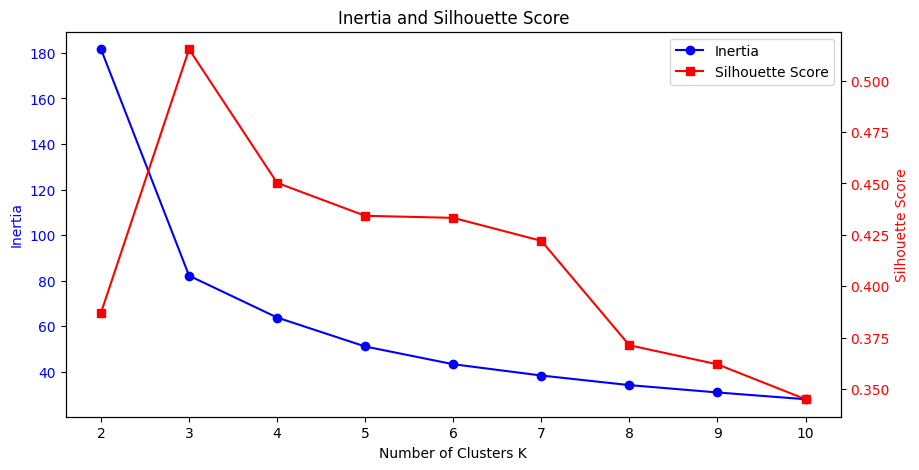

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# "mouse" dataset
np.random.seed(0)

mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0, 0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0, 0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0, 0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

data_X = np.vstack([data1, data2, data3])

# zakres liczby klastrów
K_values = range(2, 11)
inertias = []
silhouette_scores = []

for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
    kmeans.fit(data_X)

    inertia_value = kmeans.inertia_
    inertias.append(inertia_value)

    silhouette_value = silhouette_score(data_X, kmeans.labels_)
    silhouette_scores.append(silhouette_value)

    print(f"K = {K:2d} , Inertia = {inertia_value:7.2f} , Silhouette = {silhouette_value:.4f}")

# inertia i wskaźnik sylwetki
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(K_values, inertias, 'bo-', label='Inertia')
ax1.set_xlabel('Number of Clusters K')
ax1.set_ylabel('Inertia', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(K_values, silhouette_scores, 'rs-', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Inertia and Silhouette Score')
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
plt.show()


## Analiza wyników dla K-Means

**Inertia** (suma kwadratów odległości punktów od przypisanego centroidu):

$$
\text{Inertia}=\sum_{k=1}^K \sum_{x_i \in C_k}\left\|x_i-\mu_k\right\|^2
$$

Wartość Inertia maleje wraz ze wzrostem liczby klastrów, co jest oczekiwane, ponieważ większa liczba klastrów pozwala lepiej dopasować centrum do danych. Spadek Inertia jest monotoniczny i nie pozwala jednoznacznie określić optymalnego $K$.

----------------------------
**Silhouette Score** mierzy, jak dobrze punkty są przypisane do swojego klastra w porównaniu z najbliższym sąsiednim klastrem. Dla pojedynczego punktu $i$ definiujemy:

$$
s(i)=\frac{b(i)-a(i)}{\max \{a(i), b(i)\}}
$$

gdzie:
- $a(i)$ - średnia odległość punktu $i$ od pozostałych punktów w tym samym klastrze,
- $b(i)$ - minimalna średnia odległość punktu $i$ do punktów w dowolnym innym klastrze.

Wartość sylwetki waha się między -1 a 1; im bliżej 1, tym lepiej dane są podzielone.

wyniki:

 $K=2$: Silhouette $=0.3870$

 $K=3$: Silhouette $=0.5153$

 $K=4$: Silhouette $=0.4503$

 $K=5$: Silhouette $=0.4342$

 $K=6$: Silhouette $=0.4332$

 $K=7$: Silhouette $=0.4220$

 $K=8$: Silhouette $=0.3712$

 $K=9$: Silhouette $=0.3620$

 $K=10$: Silhouette $=0.3450$

Najwyższa wartość wskaźnika sylwetki występuje dla K=3 (0.5153). Dla K=2 lub K>3 obserwujemy spadek wartości sylwetki, co oznacza, że przy mniejszej lub większej liczbie klastrów separacja i zwartość klastrów nie są optymalne.


K =  1 , Average Log-Likelihood = -1.6647 , Silhouette = nan
K =  2 , Average Log-Likelihood = -1.3994 , Silhouette = 0.4054
K =  3 , Average Log-Likelihood = -1.2485 , Silhouette = 0.4650
K =  4 , Average Log-Likelihood = -1.2423 , Silhouette = 0.4165
K =  5 , Average Log-Likelihood = -1.2440 , Silhouette = 0.4228
K =  6 , Average Log-Likelihood = -1.2417 , Silhouette = 0.4211
K =  7 , Average Log-Likelihood = -1.2314 , Silhouette = 0.4176
K =  8 , Average Log-Likelihood = -1.2188 , Silhouette = 0.3437
K =  9 , Average Log-Likelihood = -1.2133 , Silhouette = 0.3441
K = 10 , Average Log-Likelihood = -1.1909 , Silhouette = 0.3006


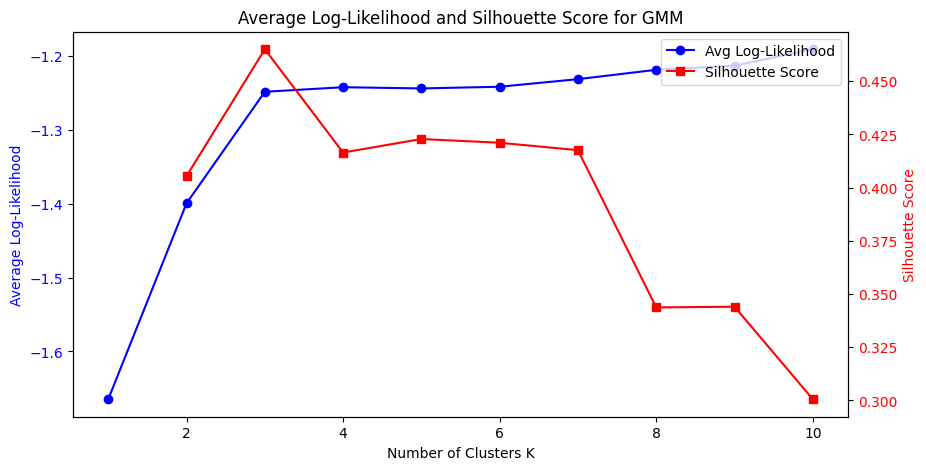

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# "mouse" dataset
np.random.seed(0)

mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0, 0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0, 0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0, 0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

data_X = np.vstack([data1, data2, data3])

# liczba klastrów
K_values = range(1, 11)
log_likelihoods = []
silhouette_scores = []

for K in K_values:
    # GMM z K klastrami
    gmm = GaussianMixture(n_components=K, covariance_type='full', random_state=42)
    gmm.fit(data_X)

    # score zwraca średni log-likelihood
    avg_log_likelihood = gmm.score(data_X)
    log_likelihoods.append(avg_log_likelihood)

    # Wskaźnik sylwetki
    if K > 1:
        labels = gmm.predict(data_X)
        sil_score = silhouette_score(data_X, labels)
        silhouette_scores.append(sil_score)
    else:
        silhouette_scores.append(np.nan)

    print(f"K = {K:2d} , Average Log-Likelihood = {avg_log_likelihood:.4f} , Silhouette = {silhouette_scores[-1]:.4f}")

# log-likelihood
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(K_values, log_likelihoods, 'bo-', label='Avg Log-Likelihood')
ax1.set_xlabel('Number of Clusters K')
ax1.set_ylabel('Average Log-Likelihood', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
# wskaźnik sylwetki
ax2.plot([k for k in K_values if k > 1],
         [sil for k, sil in zip(K_values, silhouette_scores) if k > 1],
         'rs-', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Average Log-Likelihood and Silhouette Score for GMM')
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
plt.show()



--------------

## Analiza wyników dla GMM

średni log-likelihood oraz wskaźnik sylwetki (Silhouette Score)

wyniki:

 $K=1$: Avg Log-Likelihood $=-1.6647$, Silhouette $=\mathrm{n} / \mathrm{d}$

 $K=2$: Avg Log-Likelihood $=-1.3994$, Silhouette $=0.4054$

 $K=3$: Avg Log-Likelihood $=-1.2485$, Silhouette $=0.4650$

 $K=4$: Avg Log-Likelihood $=-1.2423$, Silhouette $=0.4165$

 $K=5$: Avg Log-Likelihood $=-1.2440$, Silhouette $=0.4228$

 $K=6$: Avg Log-Likelihood $=-1.2417$, Silhouette $=0.4211$

 $K=7$: Avg Log-Likelihood $=-1.2314$, Silhouette $=0.4176$

 $K=8$: Avg Log-Likelihood $=-1.2188$, Silhouette $=0.3437$

 $K=9$: Avg Log-Likelihood $=-1.2133$, Silhouette $=0.3441$

 $K=10$: Avg Log-Likelihood $=-1.1909$, Silhouette $=0.3006$

**Średni log-likelihood**

Model GMM (Gaussian Mixture Model) zakłada, że dane $\left\{x_1, \ldots, x_N\right\}$ pochodzą z mieszaniny $K$ rozkładów Gaussa. średni log-likelihood oblicza się jako:

$$
\frac{1}{N} \sum_{n=1}^N \ln \left(p\left(x_n \mid \theta\right)\right)
$$

gdzie $\theta$ to parametry $\left\{\pi_k, \mu_k, \Sigma_k\right\}$ dla $k=1, \ldots, K$.

W powyższych wynikach widać, że wraz ze wzrostem K log-likelihood rośnie (np. -1.6647 przy K=1 do -1.1909 przy K=10). Wynika to z tego, że większa liczba rozkładów Gaussa lepiej dopasowuje się do danych.

Wysoki log-likelihood przy dużym K może oznaczać overfitting, czyli model dopasowuje się do szumu w danych.

---

**Silhouette Score** mierzy, jak dobrze punkty są przypisane do swojego klastra w porównaniu z najbliższym sąsiednim klastrem. Dla pojedynczego punktu $i$ definiujemy:

$$
s(i)=\frac{b(i)-a(i)}{\max \{a(i), b(i)\}}
$$

gdzie:
- $a(i)$ - średnia odległość punktu $i$ od pozostałych punktów w tym samym klastrze,
- $b(i)$ - minimalna średnia odległość punktu $i$ do punktów w dowolnym innym klastrze.

Wartość sylwetki waha się między -1 a 1; im bliżej 1, tym lepiej dane są podzielone.


Najwyższą wartość otrzymujemy dla K=3 (0.4650). Dla K=2 wartość jest niższa (0.4054). Dla K>3 obserwujemy spadek.

Czyli przy K=3 otrzymujemy najlepszy balans między zwartością a separacją klastrów.


